In [1]:
!ls

data					    __pycache__
distilled_model.pdf			    ROC_distilled_model_ctu.png
evaluate_distilled_model_results.ipynb	    roc_network_ctu.png
evaluate_predictions.ipynb		    roc_network.png
model.keras				    test_data.pk
nn_connector_model.py			    train_data.pk
nn_connector_model.py.ff.final.dot	    train_model.ipynb
nn_connector_model.py.ff.final.json	    train_model_torch.ipynb
nn_connector_model.py.ff.final.json.result  write_test_set_to_abbadingo.ipynb
predict_and_save.ipynb			    write_train_set_to_abbadingo.ipynb
predict_and_save_torch.ipynb		    X_pred.pk
preprocess_data.ipynb


In [2]:
!ls data

data_preprocessed_10.csv.encoded.dat  X_train.dat
data_preprocessed_10.csv.labels.txt   X_train.dat.ff.final.dot
data_preprocessed_9.csv.encoded.dat   X_train.dat.ff.final.json
data_preprocessed_9.csv.labels.txt    X_train.dat.ff.init.dot
scenarios_9_10.zip		      X_train.dat.ff.init.json
X_test.dat			      y_test.txt


In [3]:
import pandas as pd
import pickle as pk

label_file = "data/y_test.txt"
results_file = "nn_connector_model.py.ff.final.json.result"

df = pd.read_csv(results_file, delimiter=";")
df

,row nr,abbadingo trace,state sequence,score sequence,sum scores,mean scores,min score
0,1,"""0 10 61 61 89 89 61 11 11 11 11 11""","[21,40,40,40,39,9,4,34,39,9,9]","[-2.06339,-1.11852,-1.13925,-1.13925,-0.96127...",-15.9020,-1.44564,-3.24043
1,1,"""1 10 77 77 77 77 77 77 77 77 77 77""","[6,6,6,6,6,6,6,6,6,6,6]","[-100,-100,-100,-100,-100,-100,-100,-100,-100...",-1002.5400,-91.13990,-100.00000
2,1,"""1 10 77 77 77 77 77 77 77 77 77 77""","[6,6,6,6,6,6,6,6,6,6,6]","[-100,-100,-100,-100,-100,-100,-100,-100,-100...",-1002.5400,-91.13990,-100.00000
3,1,"""1 10 77 77 77 77 77 77 77 77 77 77""","[6,6,6,6,6,6,6,6,6,6,6]","[-100,-100,-100,-100,-100,-100,-100,-100,-100...",-1002.5400,-91.13990,-100.00000
4,1,"""0 10 72 29 6 29 47 47 37 33 29 6""","[29,22,30,31,29,10,1,28,18,16,16]","[-6.32275,-3.87931,-3.10132,-7.48401,-4.02614...",-54.4120,-4.94655,-8.12515
...,...,...,...,...,...,...,...
227920,1,"""1 10 77 77 77 77 77 77 77 77 77 77""","[6,6,6,6,6,6,6,6,6,6,6]","[-100,-100,-100,-100,-100,-100,-100,-100,-100...",-1002.5400,-91.13990,-100.00000
227921,1,"""0 2 18 84""","[8,23,23]","[-4.82607,-3.45634,-2.30563]",-10.5880,-3.52935,-4.82607
227922,1,"""0 10 89 11 61 11 11 11 11 89 89 89""","[30,43,39,9,4,34,39,43,21,44,44]","[-1.84582,-1.22783,-1.98089,-0.879918,-3.0205...",-17.0195,-1.54723,-3.59244
227923,1,"""0 8 36 10 83 28 83 19 58 58""","[12,0,28,4,38,42,3,13,13]","[-5.31384,-3.96606,-5.44265,-3.3624,-11.4176,...",-235.7680,-26.19650,-100.00000


In [4]:
y = list()
with open(label_file, "rt") as inf:
    for line in inf:
        line = line.strip("\n")
        y.append(int(line))
len(df), len(y)

(227925, 227925)

In [5]:
df.columns

Index(['row nr', ' abbadingo trace', ' state sequence', ' score sequence',
       ' sum scores', ' mean scores', ' min score'],
      dtype='object')

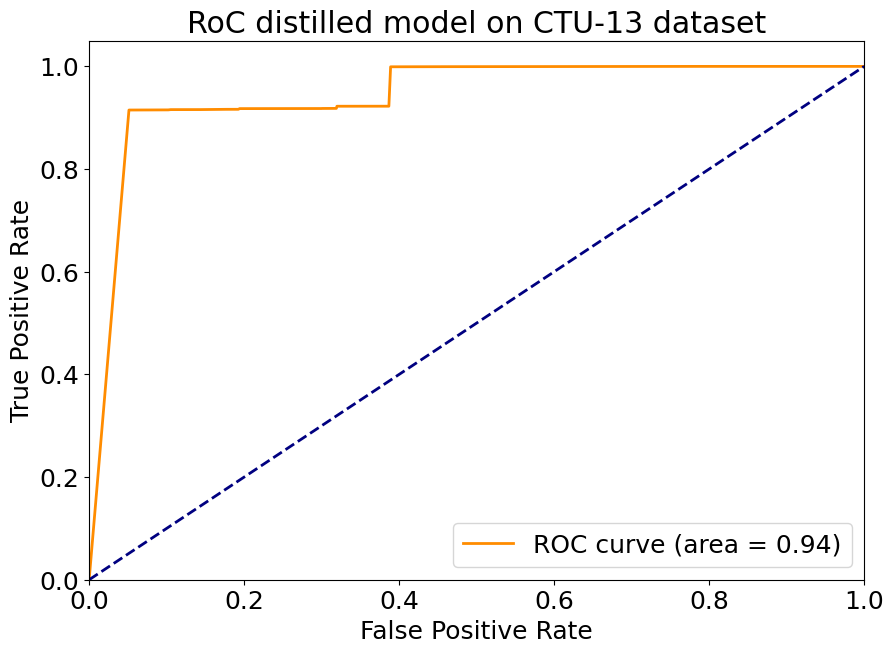

In [6]:
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

score = -df[" min score"]

fpr, tpr, thresholds = roc_curve(y, score)
roc_auc = roc_auc_score(y, score)

plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RoC distilled model on CTU-13 dataset")
plt.legend(loc="lower right")
plt.savefig("ROC_distilled_model_ctu.png")